# Importing libraries

In [320]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Downloading the dataset

In [321]:
url_movies = 'https://raw.githubusercontent.com/gabrielatrindade/movies_tmdb_pyladies_bootcamp/master/dataset/tmdb_5000_movies_v2.csv'

tmdb_movies = pd.read_csv(url_movies)

#tmdb_movies.head(2)

In [322]:
url_credits = 'https://raw.githubusercontent.com/gabrielatrindade/movies_tmdb_pyladies_bootcamp/master/dataset/tmdb_5000_credits_v2.csv'

tmdb_credits = pd.read_csv(url_credits, index_col=0)

#tmdb_credits.head(2)

# Data Inicial Exploration

### tmdb_movies

In [323]:
tmdb_movies.head(2)

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,en,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.9,4500


In [324]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 13 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
id                      4803 non-null int64
original_language       4803 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null int64
dtypes: float64(3), int64(4), object(6)
memory usage: 487.9+ KB


In [325]:
tmdb_movies[['budget','popularity', 'revenue', 'vote_average', 'vote_count']].describe()

,budget,popularity,revenue,vote_average,vote_count
count,4.803000e+03,4803.000000,4.803000e+03,4803.000000,4803.000000
mean,2.904504e+07,21.492301,8.226064e+07,6.092172,690.217989
std,4.072239e+07,31.816650,1.628571e+08,1.194612,1234.585891
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,7.900000e+05,4.668070,0.000000e+00,5.600000,54.000000
50%,1.500000e+07,12.921594,1.917000e+07,6.200000,235.000000
75%,4.000000e+07,28.313505,9.291719e+07,6.800000,737.000000
max,3.800000e+08,875.581305,2.787965e+09,10.000000,13752.000000


### tmdb_credits

In [326]:
tmdb_credits.head(2)

,movie_id,title
0,19995,Avatar
1,285,Pirates of the Caribbean: At World's End


In [327]:
tmdb_credits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 2 columns):
movie_id    4803 non-null int64
title       4803 non-null object
dtypes: int64(1), object(1)
memory usage: 112.6+ KB


# Cleaning JSON columns

Changes to make in the future: <br> 
1. Create different dataframes with `names` and (`ids` or `iso`) for each json_column <br>
2. Use the (`ids` or `iso`) on the tmbd_movies <br>
3. To check what does represent that (`ids` or `iso`) make merge and get the `name`

In [328]:
def transform_json_column_to_series(series: pd.Series) -> pd.Series:
    '''get the name key of json column and put in a list'''
    all_rows = []
    for row in series:
        column_name = (json.loads(row))
        column_name_list = [e['name'] for e in column_name]
        all_rows.append(column_name_list)
    return pd.Series(all_rows)

### genres

In [329]:
tmdb_movies['genres'][1]

'[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]'

In [330]:
tmdb_movies['genres'].update(transform_json_column_to_series(tmdb_movies['genres']))

In [331]:
#tmdb_movies.head(2)

### production_companies

In [332]:
tmdb_movies['production_companies'][0]

'[{"name": "Ingenious Film Partners", "id": 289}, {"name": "Twentieth Century Fox Film Corporation", "id": 306}, {"name": "Dune Entertainment", "id": 444}, {"name": "Lightstorm Entertainment", "id": 574}]'

In [333]:
tmdb_movies['production_companies']\
.update(transform_json_column_to_series(tmdb_movies['production_companies']))

In [334]:
#tmdb_movies.head(2)

### production_countries

In [335]:
tmdb_movies['production_countries']\
.update(transform_json_column_to_series(tmdb_movies['production_countries']))

In [336]:
#tmdb_movies.head(2)

### spoken_languages

In [337]:
tmdb_movies['spoken_languages']\
.update(transform_json_column_to_series(tmdb_movies['spoken_languages']))

In [338]:
tmdb_movies.head(2)

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,en,150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Español]",7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",285,en,139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,961000000,169.0,[English],6.9,4500


# Feature Engineering

### quantity of genres, production_companies, production_countries, spoken_languages

In [339]:
def create_count_series(column_name: str) -> pd.Series:
    count = []
    for index in range(0, len(tmdb_movies)):
        count.append(len(tmdb_movies[column_name][index]))
    name_series = column_name+'_count'
    count = pd.Series(count, name=name_series)
    return (count)

In [340]:
genres_count = create_count_series('genres')
companies_count = create_count_series('production_companies')
production_countries_count = create_count_series('production_countries')
spoken_language_count = create_count_series('spoken_languages')

tmdb_movies = pd.concat([tmdb_movies, genres_count, companies_count, 
                         production_countries_count, spoken_language_count], 
                        axis=1)

In [341]:
tmdb_movies.head()

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,genres_count,production_companies_count,production_countries_count,spoken_languages_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,en,150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Español]",7.2,11800,4,4,2,2
1,300000000,"[Adventure, Fantasy, Action]",285,en,139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,961000000,169.0,[English],6.9,4500,3,3,1,1
2,245000000,"[Action, Adventure, Crime]",206647,en,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",6.3,4466,3,3,2,5
3,250000000,"[Action, Crime, Drama, Thriller]",49026,en,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012-07-16,1084939099,165.0,[English],7.6,9106,4,4,1,1
4,260000000,"[Action, Adventure, Science Fiction]",49529,en,43.926995,[Walt Disney Pictures],[United States of America],2012-03-07,284139100,132.0,[English],6.1,2124,3,1,1,1


# Merging the dataframes

In [342]:
tmdb = tmdb_credits.merge(tmdb_movies, left_on='movie_id', right_on='id')

In [343]:
tmdb.head(2)

,movie_id,title,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,genres_count,production_companies_count,production_countries_count,spoken_languages_count
0,19995,Avatar,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,en,150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Español]",7.2,11800,4,4,2,2
1,285,Pirates of the Caribbean: At World's End,300000000,"[Adventure, Fantasy, Action]",285,en,139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,961000000,169.0,[English],6.9,4500,3,3,1,1


# More Data Exploration

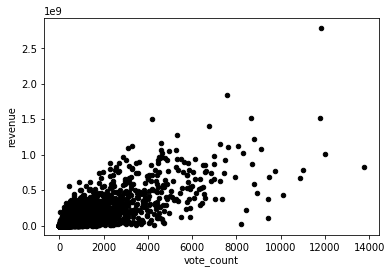

In [25]:
tmdb.plot(kind='scatter',x='vote_count',y='revenue',color='black')

#sns.regplot(tmdb['vote_count'],tmdb['revenue'])
plt.show()

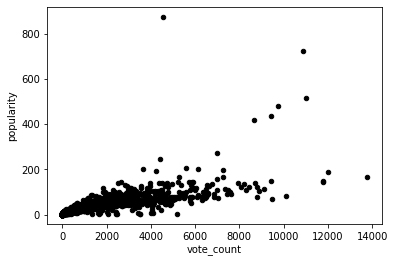

In [26]:
tmdb.plot(kind='scatter',x='vote_count',y='popularity',color='black')

#sns.regplot(tmdb['vote_count'],tmdb['popularity'])
plt.show()

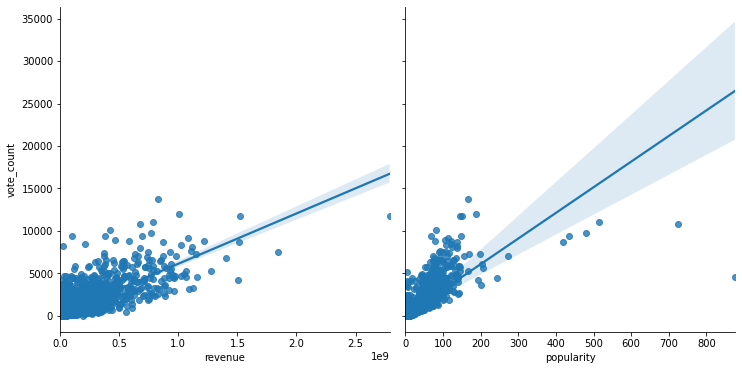

In [28]:
sns.pairplot(tmdb, y_vars='vote_count', x_vars=['revenue', 'popularity'], height=5, kind='reg')
plt.show()

# Questions

* **Is there some correlation between: budget, popularity, revenue, vote_average and vote_count?**

In [346]:
tmdb_movies[['budget', 'popularity', 'revenue', 
             'vote_average', 'vote_count']].corr()

,budget,popularity,revenue,vote_average,vote_count
budget,1.000000,0.505414,0.730823,0.093146,0.593180
popularity,0.505414,1.000000,0.644724,0.273952,0.778130
revenue,0.730823,0.644724,1.000000,0.197150,0.781487
vote_average,0.093146,0.273952,0.197150,1.000000,0.312997
vote_count,0.593180,0.778130,0.781487,0.312997,1.000000


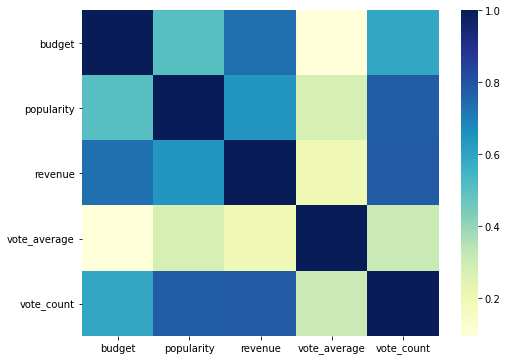

In [347]:
plt.figure(figsize=(8,6))
sns.heatmap(tmdb_movies[['budget', 'popularity', 'revenue', 
                         'vote_average', 'vote_count']].corr(), 
            cmap="YlGnBu")

plt.show()

**Which movies have the highest vote_average?**

In [27]:
tmdb[['title', 'vote_average', 'vote_count']].sort_values('vote_average', ascending=False).head(10)

,title,vote_average,vote_count
3519,Stiff Upper Lips,10.0,1
4247,Me You and Five Bucks,10.0,2
4045,"Dancer, Texas Pop. 81",10.0,1
4662,Little Big Top,10.0,1
3992,Sardaarji,9.5,2
2386,One Man's Hero,9.3,2
2970,There Goes My Baby,8.5,2
1881,The Shawshank Redemption,8.5,8205
2796,The Prisoner of Zenda,8.4,11
3337,The Godfather,8.4,5893


**Which movies people voted the most?**

In [28]:
tmdb[['title', 'vote_count', 'vote_average']].sort_values('vote_count', ascending=False).head(10)

,title,vote_count,vote_average
96,Inception,13752,8.1
65,The Dark Knight,12002,8.2
0,Avatar,11800,7.2
16,The Avengers,11776,7.4
788,Deadpool,10995,7.4
95,Interstellar,10867,8.1
287,Django Unchained,10099,7.8
94,Guardians of the Galaxy,9742,7.9
426,The Hunger Games,9455,6.9
127,Mad Max: Fury Road,9427,7.2


**Which movie have the most budget?**

In [29]:
tmdb[['title', 'budget']].sort_values('budget', ascending=False).head(10)

,title,budget
17,Pirates of the Caribbean: On Stranger Tides,380000000
1,Pirates of the Caribbean: At World's End,300000000
7,Avengers: Age of Ultron,280000000
10,Superman Returns,270000000
4,John Carter,260000000
6,Tangled,260000000
5,Spider-Man 3,258000000
13,The Lone Ranger,255000000
46,X-Men: Days of Future Past,250000000
22,The Hobbit: The Desolation of Smaug,250000000


**Which movie has the most popularity?**

In [30]:
tmdb[['title', 'popularity']].sort_values('popularity', ascending=False).head(10)

,title,popularity
546,Minions,875.581305
95,Interstellar,724.247784
788,Deadpool,514.569956
94,Guardians of the Galaxy,481.098624
127,Mad Max: Fury Road,434.278564
28,Jurassic World,418.708552
199,Pirates of the Caribbean: The Curse of the Bla...,271.972889
82,Dawn of the Planet of the Apes,243.791743
200,The Hunger Games: Mockingjay - Part 1,206.227151
88,Big Hero 6,203.734590


**Which production_companies have the most movies?**

In [31]:
list_productions = []

for list_x in tmdb['production_companies']:
    list_productions += list_x

values, counts = np.unique(list_productions, return_counts=True)

pd.DataFrame({'companies': values, 'count': counts}).sort_values('count', ascending=False).head(3)
#pd.get_dummies(str(tmdb['production_companies'][0]).strip('[]').split(','))

,companies,count
4827,Warner Bros.,319
4680,Universal Pictures,311
3362,Paramount Pictures,285


**Which production_companies have the highest budget?**

**Which production_companies have the highest revenue?**

**Which genres have the best popularity?**

**Which spoken_languages have the highest popularity?**